In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import networkx as nx
import pylab as plt

eventsEngland = pd.read_json('/content/drive/My Drive/bachelor data/events/events_England.json')
matchesEngland = pd.read_json("/content/drive/My Drive/bachelor data/matches/matches_England.json")
tagsName = pd.read_csv("/content/drive/My Drive/bachelor data/tags2name.csv")
with open('/content/drive/My Drive/bachelor data/events/events_England.json') as f:
    d = json.load(f)
    
tags = json_normalize(data=d, record_path='tags', meta=['id'], record_prefix='_')
teams = pd.read_json("/content/drive/My Drive/bachelor data/teams.json")
eventsEnglandTags = pd.merge(eventsEngland,
                       tags,
                       on='id')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
teams[teams['city'] == 'Seville']

,city,name,wyId,officialName,area,type


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
teams

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': 'XEN', 'alpha2code': ''}",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,"{'name': 'France', 'id': '250', 'alpha3code': 'FRA', 'alpha2code': 'FR'}",club
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,"{'name': 'Germany', 'id': '276', 'alpha3code': 'DEU', 'alpha2code': 'DE'}",club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': 'XEN', 'alpha2code': ''}",club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}",club


In [ ]:
import pickle
with open('/content/drive/My Drive/premierLeagueMatrices.pickle', 'rb') as dataSaved:
  manCityMatrices, manUtdMatrices, tottenhamMatrices, liverpoolMatrices, chelseaMatrices, arsenalMatrices, burnleyMatrices, evertonMatrices, leicesterMatrices, newcastleMatrices, crystalMatrices, bournemouthMatrices, westHamMatrices, watfordMatrices, brightonMatrices, huddersfieldMatrices, southamptonMatrices, swanseaMatrices, stokeMatrices, westHamMatrices = pickle.load(dataSaved)

In [ ]:
def checkZones2(dataframe, columnName):
  resultSeries = pd.Series([])
  i = -1
  for index, row in dataframe.iterrows():
    x = (row[columnName])['x']
    y = (row[columnName])['y']
    index = i + 1
    resultSeries = resultSeries.append(pd.Series([int(((x // 20) * 3) + 1 + (y // 33.3))]), ignore_index=True)
  return resultSeries

In [ ]:
# Filling 2D matrix of Barcelona team with corresponding passes
def get2dMatrix(passesDataframe, senderColumnName, RecipientColumnName):
  arr = np.arange(225).reshape(15,15)
  i = 0
  j = 0
  passCount = 0
  for i in range(15):
    for j in range(15):
      passCount = 0
      for index, row in passesDataframe.iterrows():
        if(row[senderColumnName] == i+1 and  row[RecipientColumnName] == j+1):
          passCount += 1
        arr[i][j] = passCount    
      j += 1
    i += 1 
  return arr

In [ ]:
def getTeamMatrix(teamId, teamMatchId):
  
  # Getting Successful passes of specific team in specific match
  successfulPasses = eventsEnglandTags[(eventsEnglandTags['teamId'] == teamId) & (eventsEnglandTags['matchId'] == teamMatchId) & (eventsEnglandTags['eventId'] == 8) & (eventsEnglandTags['_id'] == 1801)]
  successfulPasses.reset_index(level=0, inplace=True)

  # Adding Sender/Recipient positions
  successfulPasses2 = successfulPasses['positions'].sum()
  del successfulPasses2[1::2]
  x2 = pd.Series(successfulPasses2)
  successfulPassesSender = pd.concat([successfulPasses, pd.DataFrame(x2)], axis=1)
  successfulPassesSender.rename(columns = {0:'Sender'}, inplace = True)

  successfulPasses1 = successfulPassesSender['positions'].sum()
  del successfulPasses1[0::2]
  x = pd.Series(successfulPasses1)
  successfulPassesSenderRecipient = pd.concat([successfulPassesSender, pd.DataFrame(x)], axis=1)
  successfulPassesSenderRecipient.rename(columns = {0:'Recepient'}, inplace = True) 

  # Adding Sender/Recipient zones

  zoneSeriesSender = checkZones2(successfulPassesSenderRecipient, 'Sender')
  zoneDataframeSender = pd.DataFrame(zoneSeriesSender)
  zoneDataframeSender.rename(columns = {0:'SenderZone'}, inplace = True)

  zoneSeriesRecipient = checkZones2(successfulPassesSenderRecipient, 'Recepient')
  zoneDataframeRecipient = pd.DataFrame(zoneSeriesRecipient)
  zoneDataframeRecipient.rename(columns = {0:'RecipientZone'}, inplace = True)

  successfulPassesSenderRecipientZ = pd.concat([successfulPassesSenderRecipient, zoneDataframeSender], axis=1)
  successfulPassesSenderRecipientZone = pd.concat([successfulPassesSenderRecipientZ, zoneDataframeRecipient], axis=1)
  
  # returning the 2D passes Matrix
  return get2dMatrix(successfulPassesSenderRecipientZone, 'SenderZone', 'RecipientZone').flatten()

In [ ]:
def getTeamMatches(teamId):
  teamMatchesIds = np.array([])
  eventsEnglandTeam = eventsEngland[eventsEngland['teamId'] == teamId]
  teamMatchesIds = eventsEnglandTeam.matchId.unique()
  return teamMatchesIds

In [ ]:
def getTeamMatrices(teamId):
  teamMatches = getTeamMatches(teamId)
  teamMatrices = np.zeros((len(teamMatches), 225))
  for i in range(len(teamMatches)):
    teamMatrices[i] = getTeamMatrix(teamId, teamMatches[i])
  return teamMatrices

In [ ]:
pd.set_option('display.max_colwidth', 50)
getTeamMatches(1612)

array([2499727, 2499733, 2499743, 2499754, 2499763, 2499773, 2499785,
       2499793, 2499807, 2499815, 2499828, 2499835, 2499842, 2499858,
       2499861, 2499872, 2499887, 2499889, 2499899, 2499913, 2499923,
       2499931, 2499943, 2499957, 2499959, 2499975, 2499984, 2499995,
       2500003, 2500014, 2500023, 2500032, 2500043, 2500052, 2500068,
       2500072, 2500082, 2500092])

In [ ]:
matchesEngland[matchesEngland['wyId'] == 2499872]

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
221,Played,4405654,16,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",181150,2017-12-10 14:15:00,0,Anfield,2499872,"Liverpool - Everton, 1 - 1","December 10, 2017 at 3:15:00 PM GMT+1","[{'refereeId': 378951, 'role': 'referee'}, {'r...",Regular,364


In [ ]:
arrMatch = getTeamMatrix(1623, 2499872).reshape(15, 15)
df2 = pd.DataFrame(data=arrMatch)
print(df2.sum(numeric_only=True).sum())
fifth = df2[12] + df2[13] + df2[14]
b = fifth.sum()
c = df2.iloc[0:9, 12:15].sum().sum()
print(((c/(b))* 100).round(1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


94
28.6


In [ ]:
right = df2[11] + df2[14]
middle = df2[10] + df2[13] 
left = df2[9] + df2[12] 
totalFront = df2[9] + df2[12] + df2[10] + df2[13] + df2[11] + df2[14]
print(((left.sum()/totalFront.sum()) * 100).round(1))
print(((middle.sum()/totalFront.sum()) * 100).round(1))
print(((right.sum()/totalFront.sum()) * 100).round(1))

31.0
19.0
50.0


In [ ]:
manCityMatrices = np.zeros((38, 225))
manCityMatrices = getTeamMatrices(1625)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
print(manCityMatrices)


[[ 2.  5.  3. ...  2. 15. 27.]
 [11.  4.  7. ...  5.  9. 12.]
 [ 1.  3.  2. ...  1. 10. 10.]
 ...
 [ 4.  4.  2. ...  0.  5. 26.]
 [ 8.  1.  4. ...  3. 15. 26.]
 [ 4.  5.  5. ...  0.  8. 16.]]


In [ ]:
manUtdMatrices = np.zeros((38, 225))
manUtdMatrices = getTeamMatrices(1611)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
manUtdMatrices

array([[ 0.,  1.,  3., ...,  3.,  6., 12.],
       [ 2.,  0.,  0., ...,  0.,  4., 11.],
       [ 2.,  4.,  1., ...,  4., 19., 39.],
       ...,
       [ 7.,  8.,  1., ...,  2., 10., 18.],
       [ 4., 10.,  1., ...,  2.,  3., 15.],
       [ 6.,  4.,  2., ...,  0.,  2.,  8.]])

In [ ]:
tottenhamMatrices = np.zeros((38, 225))
tottenhamMatrices = getTeamMatrices(1624)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
tottenhamMatrices

array([[ 5.,  5.,  9., ...,  1., 16., 15.],
       [ 0.,  0.,  1., ...,  0., 10., 14.],
       [ 7.,  2.,  1., ...,  3.,  6., 14.],
       ...,
       [ 0.,  4.,  2., ...,  2.,  8., 13.],
       [ 3.,  3.,  1., ...,  2., 22., 25.],
       [ 6.,  3.,  4., ...,  1.,  3., 10.]])

In [ ]:
stokeMatrices = np.zeros((38, 225))
stokeMatrices = getTeamMatrices(1639)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
stokeMatrices

array([[ 3.,  3.,  3., ...,  0.,  2.,  8.],
       [ 1.,  0.,  0., ...,  1.,  0.,  2.],
       [ 1.,  3.,  0., ...,  1.,  7., 13.],
       ...,
       [ 6.,  2.,  2., ...,  1.,  0.,  2.],
       [ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 9.,  9.,  7., ...,  0.,  0.,  4.]])

In [ ]:
southamptonMatrices = np.zeros((38, 225))
southamptonMatrices = getTeamMatrices(1619)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
southamptonMatrices

array([[ 5.,  3.,  0., ...,  3.,  8., 12.],
       [ 3.,  0.,  1., ...,  5.,  3.,  9.],
       [ 8.,  4.,  4., ...,  2.,  1.,  5.],
       ...,
       [ 2.,  0.,  3., ...,  1.,  1.,  7.],
       [ 2.,  4.,  1., ...,  2.,  3., 10.],
       [ 0.,  0.,  0., ...,  0.,  6.,  3.]])

In [ ]:
crystalMatrices = np.zeros((38, 225))
crystalMatrices = getTeamMatrices(1628)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
crystalMatrices

array([[ 0.,  4.,  1., ...,  1.,  0.,  5.],
       [ 1.,  2.,  0., ...,  1.,  2.,  6.],
       [ 6.,  3.,  3., ...,  0.,  6., 11.],
       ...,
       [ 2.,  4.,  1., ...,  1.,  5., 20.],
       [ 9.,  1.,  1., ...,  1.,  4.,  6.],
       [ 7.,  6.,  1., ...,  4., 11., 18.]])

In [ ]:
bournemouthMatrices = np.zeros((38, 225))
bournemouthMatrices = getTeamMatrices(1659)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
bournemouthMatrices

array([[11.,  4.,  5., ...,  5.,  4., 15.],
       [ 3.,  2.,  2., ...,  0.,  1.,  5.],
       [ 5.,  3.,  2., ...,  1.,  0.,  2.],
       ...,
       [13.,  5.,  2., ...,  5.,  3., 13.],
       [ 5.,  6.,  0., ...,  1.,  6.,  6.],
       [ 2.,  2.,  0., ...,  0.,  1.,  3.]])

In [ ]:
liverpoolMatrices = np.zeros((38, 225))
liverpoolMatrices = getTeamMatrices(1612)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
liverpoolMatrices

array([[ 4.,  5.,  5., ...,  2.,  4.,  5.],
       [ 9.,  2.,  3., ...,  1.,  5.,  7.],
       [ 1.,  7.,  1., ...,  2.,  7.,  6.],
       ...,
       [ 2.,  4.,  1., ...,  4.,  6., 12.],
       [ 5.,  4.,  3., ...,  4.,  8., 11.],
       [ 2.,  3.,  4., ...,  1.,  6., 16.]])

In [ ]:
swanseaMatrices = np.zeros((38, 225))
swanseaMatrices = getTeamMatrices(10531)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
swanseaMatrices

array([[ 0.,  0.,  4., ...,  1.,  1.,  0.],
       [ 1.,  1.,  1., ...,  1.,  2.,  5.],
       [ 0.,  4.,  2., ...,  2.,  1., 19.],
       ...,
       [ 2.,  3.,  1., ...,  4.,  8., 29.],
       [ 4.,  0.,  1., ...,  3.,  2., 12.],
       [ 1.,  2.,  0., ...,  1.,  9., 23.]])

In [ ]:
westBromMatrices = np.zeros((38, 225))
westBromMatrices = getTeamMatrices(1627)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
westBromMatrices

array([[ 0.,  2.,  0., ...,  0.,  4., 10.],
       [ 0.,  2.,  0., ...,  0.,  1.,  3.],
       [ 1.,  1.,  0., ...,  1.,  0.,  3.],
       ...,
       [ 4.,  2.,  2., ...,  0.,  2., 10.],
       [ 2.,  3.,  0., ...,  1.,  1.,  2.],
       [ 5.,  4.,  2., ...,  1.,  5.,  3.]])

In [ ]:
chelseaMatrices = np.zeros((38, 225))
chelseaMatrices = getTeamMatrices(1610)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
chelseaMatrices

array([[ 1.,  5.,  1., ...,  3.,  6.,  9.],
       [ 8.,  2.,  3., ...,  3.,  3.,  3.],
       [ 7., 10.,  6., ...,  2.,  9.,  8.],
       ...,
       [16.,  4., 11., ...,  2.,  7., 11.],
       [ 7.,  3.,  2., ...,  4.,  4., 10.],
       [10.,  6.,  4., ...,  0.,  8., 14.]])

In [ ]:
arsenalMatrices = np.zeros((38, 225))
arsenalMatrices = getTeamMatrices(1609)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
arsenalMatrices

array([[2., 2., 1., ..., 1., 9., 4.],
       [2., 4., 2., ..., 4., 6., 8.],
       [3., 4., 3., ..., 3., 2., 9.],
       ...,
       [6., 3., 4., ..., 4., 2., 6.],
       [6., 3., 2., ..., 0., 8., 8.],
       [3., 6., 5., ..., 0., 3., 6.]])

In [ ]:
burnleyMatrices = np.zeros((38, 225))
burnleyMatrices = getTeamMatrices(1646)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
burnleyMatrices

array([[ 0.,  2.,  1., ...,  3.,  2.,  4.],
       [ 5.,  2.,  0., ...,  5.,  4., 13.],
       [ 1.,  1.,  0., ...,  0.,  0.,  4.],
       ...,
       [ 1.,  2.,  1., ...,  3.,  2.,  8.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.],
       [ 0.,  1.,  0., ...,  3.,  2., 11.]])

In [ ]:
evertonMatrices = np.zeros((38, 225))
evertonMatrices = getTeamMatrices(1623)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
evertonMatrices

array([[ 4.,  4.,  2., ...,  3.,  5., 18.],
       [ 4.,  3.,  1., ...,  1.,  4., 12.],
       [ 4.,  4.,  4., ...,  0.,  1., 11.],
       ...,
       [ 4.,  6.,  0., ...,  0.,  3.,  3.],
       [ 6.,  5.,  1., ...,  2.,  4., 19.],
       [ 1.,  1.,  1., ...,  1.,  4.,  5.]])

In [ ]:
leicesterMatrices = np.zeros((38, 225))
leicesterMatrices = getTeamMatrices(1631)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
leicesterMatrices

array([[0., 0., 0., ..., 1., 4., 3.],
       [3., 6., 3., ..., 1., 2., 8.],
       [0., 0., 0., ..., 0., 1., 3.],
       ...,
       [4., 3., 1., ..., 3., 4., 7.],
       [4., 5., 3., ..., 1., 1., 1.],
       [6., 0., 0., ..., 0., 0., 0.]])

In [ ]:
newcastleMatrices = np.zeros((38, 225))
newcastleMatrices = getTeamMatrices(1613)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
newcastleMatrices

array([[ 2.,  3.,  1., ...,  1.,  2.,  4.],
       [ 3.,  2.,  2., ...,  1.,  2., 10.],
       [ 4.,  2.,  0., ...,  3.,  1., 13.],
       ...,
       [ 2.,  5.,  0., ...,  4.,  9., 16.],
       [ 3.,  3.,  3., ...,  4.,  4., 29.],
       [ 2.,  5.,  1., ...,  5.,  3., 21.]])

In [ ]:
westHamMatrices = np.zeros((38, 225))
westHamMatrices = getTeamMatrices(1633)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
westHamMatrices

array([[1., 3., 1., ..., 2., 3., 8.],
       [4., 3., 1., ..., 1., 0., 9.],
       [1., 8., 1., ..., 0., 0., 9.],
       ...,
       [1., 2., 0., ..., 1., 1., 5.],
       [0., 2., 0., ..., 1., 6., 7.],
       [1., 2., 2., ..., 2., 5., 2.]])

In [ ]:
watfordMatrices = np.zeros((38, 225))
watfordMatrices = getTeamMatrices(1644)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
watfordMatrices

array([[ 0.,  1.,  2., ...,  2.,  5., 20.],
       [ 6.,  3.,  0., ...,  1.,  7., 14.],
       [ 4.,  2.,  0., ...,  0.,  2., 13.],
       ...,
       [ 5.,  3.,  0., ...,  1.,  4.,  3.],
       [ 5.,  3.,  1., ...,  1.,  1.,  6.],
       [ 2.,  4.,  3., ...,  4.,  5., 11.]])

In [ ]:
brightonMatrices = np.zeros((38, 225))
brightonMatrices = getTeamMatrices(1651)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
brightonMatrices

array([[ 0.,  2.,  1., ...,  1.,  1.,  3.],
       [ 3.,  7.,  2., ...,  2.,  3.,  6.],
       [ 1.,  3.,  3., ...,  0.,  5., 12.],
       ...,
       [ 3.,  2.,  1., ...,  0.,  3.,  7.],
       [ 0.,  1.,  2., ...,  0.,  5., 14.],
       [ 5.,  2.,  3., ...,  0.,  1.,  6.]])

In [ ]:
huddersfieldMatrices = np.zeros((38, 225))
huddersfieldMatrices = getTeamMatrices(1673)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
huddersfieldMatrices

array([[ 4.,  2.,  1., ...,  0.,  4.,  3.],
       [11., 10.,  4., ...,  2.,  2., 19.],
       [ 4.,  1.,  1., ...,  3.,  7.,  6.],
       ...,
       [ 0.,  0.,  2., ...,  3.,  8.,  6.],
       [ 1.,  0.,  0., ...,  0.,  2.,  8.],
       [ 3.,  4.,  2., ...,  5.,  2., 13.]])

In [ ]:
mixMatrices = np.concatenate((manCityMatrices, manUtdMatrices, tottenhamMatrices, liverpoolMatrices, chelseaMatrices, arsenalMatrices, burnleyMatrices, evertonMatrices, leicesterMatrices, newcastleMatrices, crystalMatrices, bournemouthMatrices, westHamMatrices, watfordMatrices, brightonMatrices, huddersfieldMatrices, southamptonMatrices, swanseaMatrices, stokeMatrices, westBromMatrices))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 2)
principalComponents = pca3.fit_transform(mixMatrices)
principalDf3 = pd.DataFrame(data = principalComponents, columns= ['0', '1'])
principalDf3.head()

,0,1
0,44.696809,-20.166380
1,6.785671,-8.141939
2,17.844478,-6.349960
3,48.616200,1.924452
4,21.491333,7.879862


In [ ]:
cols=[]
for i in range(760):
  if i<38:
    cols.append('red')
  else:
    if (i<76):  
      cols.append('black')
    else:
      if (i<114):
        cols.append('yellow')
      else:
        if (i<152):
          cols.append('blue')  
        else:
          if (i<190):
            cols.append('purple')
          else:
           if (i<228):
             cols.append('pink')  
           else:
            if (i<266):
              cols.append('navy')
            else:
              if (i<304):
               cols.append('turquoise')
              else:
                if (i<342):
                  cols.append('violet')
                else:
                  if (i<380):
                    cols.append('magenta')
                  else:
                    if (i<418):
                     cols.append('gray')
                    else:
                      if (i<456):
                       cols.append('cyan')
                      else:
                        if (i<494):
                          cols.append('brown')
                        else:
                          if (i<532):
                            cols.append('gold')
                          else:
                            if (i<570):
                              cols.append('orange')
                            else:
                              if (i<608):
                                cols.append('azure')  
                              else:
                                if (i<646):
                                  cols.append('salmon')
                                else:
                                  if (i<684):
                                    cols.append('darkviolet')  
                                  else:
                                    if (i<684):
                                      cols.append('lime')
                                    else:
                                      cols.append('silver')
                                     

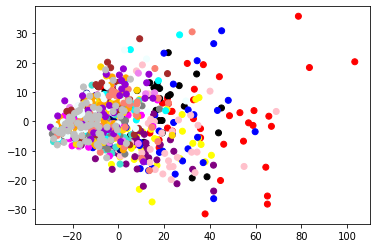

In [ ]:
plt.scatter(principalDf3['0'], principalDf3['1'], c=cols)

In [ ]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(principalDf3[['0', '1']])
model.cluster_centers_

array([[-8.17663403,  0.53231896],
       [26.93207706, -1.75334438]])

In [ ]:
centroids = pd.DataFrame(model.cluster_centers_, columns=["0", "1"])
principalDf3['predicted'] = model.labels_
principalDf3.head()

,0,1,predicted
0,44.696809,-20.166380,1
1,6.785671,-8.141939,0
2,17.844478,-6.349960,1
3,48.616200,1.924452,1
4,21.491333,7.879862,1


In [ ]:
manCityCluster1 = 0
manCityCluster2 = 0
swanseaCluster1 = 0 
swanseaCluster2 = 0
westBromCluster1 = 0
westBromCluster2 = 0
liverpoolCluster1 = 0
liverpoolCluster2 = 0

for index, row in principalDf3.iterrows():
  if(index < 38):
    if(row['predicted'] == 0):
      manCityCluster1 += 1
    else:
      manCityCluster2 += 1
  else:
    if(index < 76):
      if(row['predicted'] == 0):
        swanseaCluster1 += 1
      else:
        swanseaCluster2 += 1
    else:
      if(index < 114):
        if(row['predicted'] == 0):
          westBromCluster1 += 1
        else:
          westBromCluster2 += 1  
      else:
        if(row['predicted'] == 0):
          liverpoolCluster1 += 1
        else:
          liverpoolCluster2 += 1  

print(manCityCluster1)
print(manCityCluster2)
print(swanseaCluster1)
print(swanseaCluster2)
print(westBromCluster1)
print(westBromCluster2)
print(liverpoolCluster1)
print(liverpoolCluster2)

3
35
17
21
18
20
545
101


<Figure size 504x504 with 0 Axes>

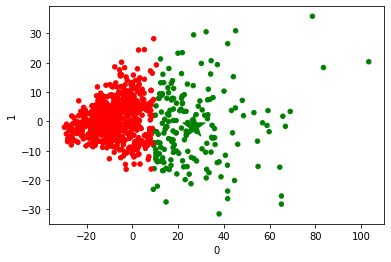

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
principalDf3['color'] = principalDf3['predicted'].map(lambda p: colors[p])
ax = principalDf3.plot(    
    kind="scatter", 
    x="0", y="1",
    c = principalDf3['color']
)
centroids.plot(
    kind="scatter", 
    x="0", y="1", 
    marker="*", c=["r", "g"], s=550,
    ax=ax
)

In [ ]:
#MinMaxScaler
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
pca5 = PCA(n_components = 2)
mixMatrices_scaled = min_max_scaler.fit_transform(mixMatrices)
principalComponents = pca5.fit_transform(mixMatrices_scaled)
principalDf5 = pd.DataFrame(data = principalComponents, columns= ['0', '1'])
principalDf5.tail()


pca5.components_[0]

array([ 2.57539521e-02,  5.36162025e-02,  7.05850620e-02,  3.82612968e-02,
        5.97574054e-03,  2.67928887e-02,  4.56440338e-02,  2.22364869e-02,
        2.55092638e-02,  1.39548575e-02, -1.11883398e-02, -1.19696124e-02,
       -4.87684124e-03, -3.46949477e-03,  2.26046250e-03,  2.72875027e-02,
        3.44837907e-02,  8.38463719e-02,  7.15897511e-02,  3.11610552e-02,
        6.28832621e-02,  6.82638728e-02,  6.82798711e-02,  5.63242290e-02,
        3.03205587e-02, -2.03125943e-02, -2.64073480e-02, -2.62011987e-02,
       -1.02709747e-02, -1.32583745e-03,  5.63047261e-02,  7.22272705e-02,
        5.45640595e-02,  8.76578276e-02,  6.52449172e-02,  4.40372787e-02,
        7.34158299e-02,  6.25194831e-02,  5.63543837e-02,  5.72362359e-02,
       -2.39563157e-02, -3.73437762e-02, -3.25660125e-02, -3.84134107e-02,
       -2.09168569e-02,  3.41831345e-02,  9.56393726e-02,  8.54059979e-02,
        2.48778522e-02,  2.93933436e-02,  3.43928882e-02,  6.97991493e-02,
        6.70627598e-02,  

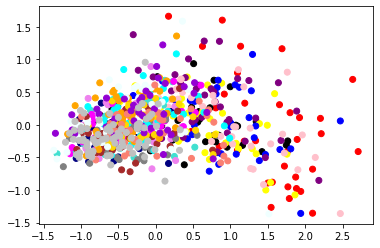

In [ ]:
#MinMaxScaler
plt.scatter(principalDf5['0'], principalDf5['1'], c=cols)

In [ ]:
#MinMaxScaler
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(principalDf5[['0', '1']])
model.cluster_centers_

array([[-0.40688633, -0.00103649],
       [ 0.99236077,  0.00252791]])

In [ ]:
getTeamMatches(1624)[33]

2500057

In [ ]:
matchesEngland[matchesEngland['wyId'] == 2500097]

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
8,Played,4405654,38,"{'1631': {'scoreET': 0, 'coachId': 209010, 'si...",181150,2018-05-13 14:00:00,1624,Wembley Stadium,2500097,"Tottenham Hotspur - Leicester City, 5 - 4","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 378951, 'role': 'referee'}, {'r...",Regular,364


In [ ]:
#MinMaxScaler
centroids = pd.DataFrame(model.cluster_centers_, columns=["0", "1"])
principalDf5['predicted'] = model.labels_
principalDf5.iloc[76: 114 , :]

,0,1,predicted
76,1.387554,0.017085,1
77,0.807579,-0.141490,1
78,0.894036,0.177055,1
79,0.346758,0.402255,1
80,1.863415,-1.075488,1
81,-0.227426,0.272892,0
82,0.421099,0.731450,1
83,1.291855,-0.367759,1
84,-0.477630,0.351921,0
85,0.305488,-0.253499,1


In [ ]:
cluster1 = np.zeros(20)
cluster2 = np.zeros(20)
i=0
x=0
y=0

for index, row in principalDf5.iterrows():
  if(i < 38):
    if(row['predicted'] == 0):
      cluster1[x] += 1
    else:
      cluster2[x] += 1
  else:
    x += 1
    i = 0
    if(row['predicted'] == 0):
      cluster1[x] += 1
    else:
      cluster2[x] += 1
  i = i+1
  y = y+1

print(cluster1)
print(cluster2)
print(y)

[ 2. 15.  7.  9.  9.  9. 38. 37. 36. 34. 37. 33. 35. 33. 38. 33. 27. 33.
 37. 37.]
[36. 23. 31. 29. 29. 29.  0.  1.  2.  4.  1.  5.  3.  5.  0.  5. 11.  5.
  1.  1.]
760


<Figure size 504x504 with 0 Axes>

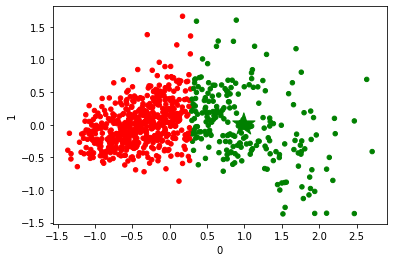

In [ ]:
#MinMaxScaler
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
principalDf5['color'] = principalDf5['predicted'].map(lambda p: colors[p])
ax = principalDf5.plot(    
    kind="scatter", 
    x="0", y="1",
    c = principalDf5['color']
)
centroids.plot(
    kind="scatter", 
    x="0", y="1", 
    marker="*", c=["r", "g"], s=550,
    ax=ax
)

In [ ]:
mixMatrixDataframe = pd.DataFrame.from_records(mixMatrices)
mixMatrixDataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224
0,2.0,5.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,6.0,0.0,5.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,1.0,1.0,3.0,5.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,3.0,1.0,6.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,2.0,2.0,15.0,27.0
1,11.0,4.0,7.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,3.0,1.0,1.0,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,3.0,6.0,0.0,2.0,1.0,3.0,1.0,...,0.0,2.0,1.0,2.0,2.0,0.0,6.0,7.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,8.0,12.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,5.0,9.0,12.0
2,1.0,3.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,3.0,5.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,4.0,6.0,4.0,5.0,6.0,2.0,5.0,1.0,...,0.0,3.0,1.0,1.0,0.0,4.0,3.0,6.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,3.0,7.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,10.0,10.0
3,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,7.0,6.0,0.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,6.0,2.0,4.0,6.0,5.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,6.0,5.0
4,1.0,2.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0,2.0,1.0,3.0,2.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,12.0,13.0,4.0,4.0,2.0,4.0,3.0,4.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,4.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,0.0,1.0,1.0,8.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,4.0,1.0,0.0,3.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,6.0,0.0,2.0,2.0,3.0,1.0,2.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0
756,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,4.0,2.0,3.0
757,4.0,2.0,2.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,10.0
758,2.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0


In [ ]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(mixMatrixDataframe[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]])
model.cluster_centers_

array([[4.2890625 , 4.1796875 , 2.48828125, 0.51171875, 0.046875  ,
        3.5078125 , 2.18359375, 0.3359375 , 0.125     , 0.06640625,
        0.203125  , 0.09765625, 0.02734375, 0.015625  , 0.01953125,
        3.87890625, 4.09375   , 5.6328125 , 3.73046875, 0.68359375,
        4.21484375, 3.9921875 , 1.94140625, 1.26953125, 0.54296875,
        0.19140625, 0.15625   , 0.03515625, 0.0859375 , 0.1171875 ,
        3.16015625, 5.48046875, 4.8515625 , 5.05078125, 3.140625  ,
        1.98828125, 2.828125  , 2.57421875, 2.921875  , 2.1328125 ,
        0.18359375, 0.20703125, 0.19140625, 0.1875    , 0.203125  ,
        0.625     , 3.54296875, 5.59375   , 4.4765625 , 4.11328125,
        0.50390625, 1.43359375, 2.27734375, 4.04296875, 4.10546875,
        0.08203125, 0.08984375, 0.0859375 , 0.1796875 , 0.20703125,
        0.0546875 , 0.53125   , 2.55859375, 4.2421875 , 4.49609375,
        0.06640625, 0.12109375, 0.46484375, 2.37890625, 3.5546875 ,
        0.02734375, 0.01953125, 0.03515625, 0.17

In [ ]:
centroids = pd.DataFrame(model.cluster_centers_, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])
mixMatrixDataframe['predicted'] = model.labels_

In [ ]:
manCityCluster1 = 0
manCityCluster2 = 0
swanseaCluster1 = 0 
swanseaCluster2 = 0
westBromCluster1 = 0
westBromCluster2 = 0
liverpoolCluster1 = 0
liverpoolCluster2 = 0

for index, row in mixMatrixDataframe.iterrows():
  if(index < 38):
    if(row['predicted'] == 0):
      manCityCluster1 += 1
    else:
      manCityCluster2 += 1
  else:
    if(index < 76):
      if(row['predicted'] == 0):
        swanseaCluster1 += 1
      else:
        swanseaCluster2 += 1
    else:
      if(index < 114):
        if(row['predicted'] == 0):
          westBromCluster1 += 1
        else:
          westBromCluster2 += 1  
      else:
        if(row['predicted'] == 0):
          liverpoolCluster1 += 1
        else:
          liverpoolCluster2 += 1  

print(manCityCluster1)
print(manCityCluster2)
print(swanseaCluster1)
print(swanseaCluster2)
print(westBromCluster1)
print(westBromCluster2)
print(liverpoolCluster1)
print(liverpoolCluster2)

28
10
21
17
22
16
185
461


In [ ]:
from google.colab import files
import pickle
with open('variables.pickle', 'wb') as f:
  pickle.dump([manCityMatrices, manUtdMatrices, tottenhamMatrices, liverpoolMatrices, chelseaMatrices, arsenalMatrices, burnleyMatrices, evertonMatrices, leicesterMatrices, newcastleMatrices, crystalMatrices, bournemouthMatrices, westHamMatrices, watfordMatrices, brightonMatrices, huddersfieldMatrices, southamptonMatrices, swanseaMatrices, stokeMatrices, westHamMatrices], f)
files.download('variables.pickle')   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('variables.pickle', 'rb') as f:
    var_you_want_to_load_into = pickle.load(f)

var_you_want_to_load_into

[array([[ 2.,  5.,  3., ...,  2., 15., 27.],
        [11.,  4.,  7., ...,  5.,  9., 12.],
        [ 1.,  3.,  2., ...,  1., 10., 10.],
        ...,
        [ 4.,  4.,  2., ...,  0.,  5., 26.],
        [ 8.,  1.,  4., ...,  3., 15., 26.],
        [ 4.,  5.,  5., ...,  0.,  8., 16.]]),
 array([[ 0.,  1.,  3., ...,  3.,  6., 12.],
        [ 2.,  0.,  0., ...,  0.,  4., 11.],
        [ 2.,  4.,  1., ...,  4., 19., 39.],
        ...,
        [ 7.,  8.,  1., ...,  2., 10., 18.],
        [ 4., 10.,  1., ...,  2.,  3., 15.],
        [ 6.,  4.,  2., ...,  0.,  2.,  8.]]),
 array([[ 5.,  5.,  9., ...,  1., 16., 15.],
        [ 0.,  0.,  1., ...,  0., 10., 14.],
        [ 7.,  2.,  1., ...,  3.,  6., 14.],
        ...,
        [ 0.,  4.,  2., ...,  2.,  8., 13.],
        [ 3.,  3.,  1., ...,  2., 22., 25.],
        [ 6.,  3.,  4., ...,  1.,  3., 10.]]),
 array([[ 4.,  5.,  5., ...,  2.,  4.,  5.],
        [ 9.,  2.,  3., ...,  1.,  5.,  7.],
        [ 1.,  7.,  1., ...,  2.,  7.,  6.],
        ..

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

manCityMatrices

<IPython.core.display.Javascript object>

array([[ 2.,  5.,  3., ...,  2., 15., 27.],
       [11.,  4.,  7., ...,  5.,  9., 12.],
       [ 1.,  3.,  2., ...,  1., 10., 10.],
       ...,
       [ 4.,  4.,  2., ...,  0.,  5., 26.],
       [ 8.,  1.,  4., ...,  3., 15., 26.],
       [ 4.,  5.,  5., ...,  0.,  8., 16.]])